#Audio Classification EDA


*Datasets - https://urbansounddataset.weebly.com/download-urbansound8k.html*

In [3]:
!pip install librosa

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [5]:
filename='/content/drive/MyDrive/UrbanSound8K/audio/fold10/100648-1-0-0.wav'

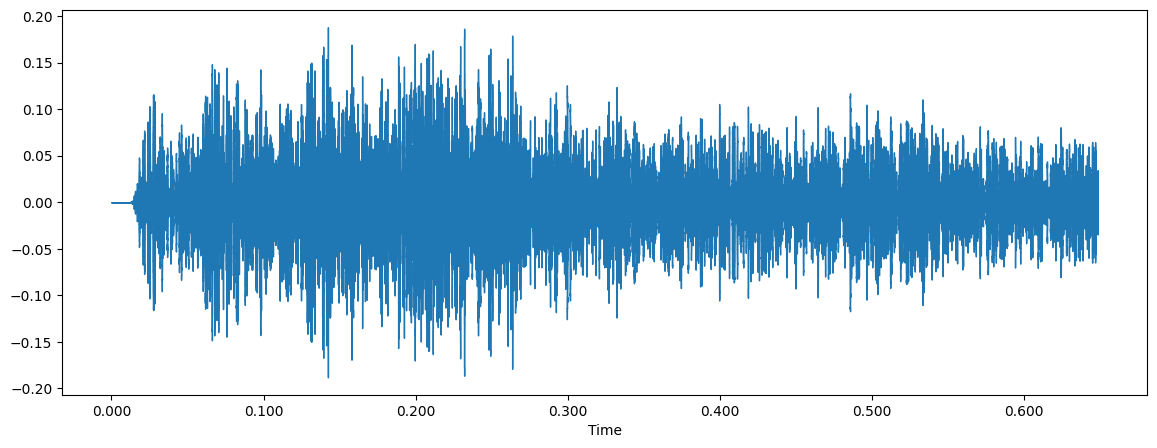

In [6]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)


In [7]:
sample_rate

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [9]:
wave_sample_rate

44100

In [10]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [1043, 1043],
       [1026, 1026],
       [1073, 1073]], dtype=int16)

In [11]:
data

array([-1.0710210e-08, -5.1222742e-09, -6.5192580e-09, ...,
        1.8561386e-02,  2.6891200e-02,  3.4412310e-02], dtype=float32)

In [12]:
import pandas as pd
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
metadata['class'].value_counts()

,count
class,
dog_bark,1000
children_playing,1000
air_conditioner,1000
street_music,1000
engine_idling,1000
jackhammer,1000
drilling,1000
siren,929
car_horn,429


#Audio Classification Preprocessing

In [14]:
audio_file_path='/content/drive/MyDrive/UrbanSound8K/audio/fold3/102105-3-0-0.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [15]:
print(librosa_audio_data)

[-0.01117705 -0.02542625 -0.02491572 ...  0.06100571  0.07081934
  0.08787692]


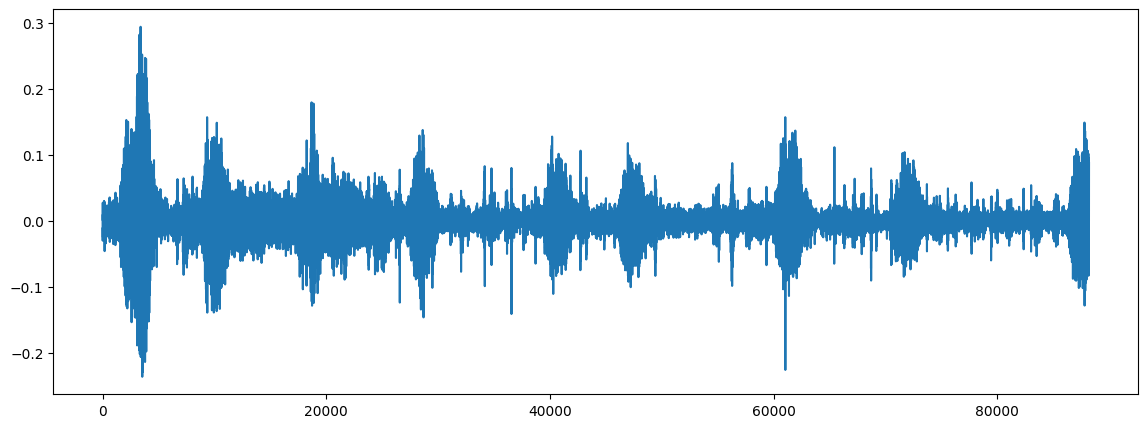

In [16]:
plt.figure(figsize=(14,5))
plt.plot(librosa_audio_data)
plt.show()

In [17]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [18]:
wave_audio

array([[   76, -1034],
       [ -169, -1034],
       [ -547, -1092],
       ...,
       [ 5538,  -354],
       [ 5498,   -67],
       [ 5269,   312]], dtype=int16)

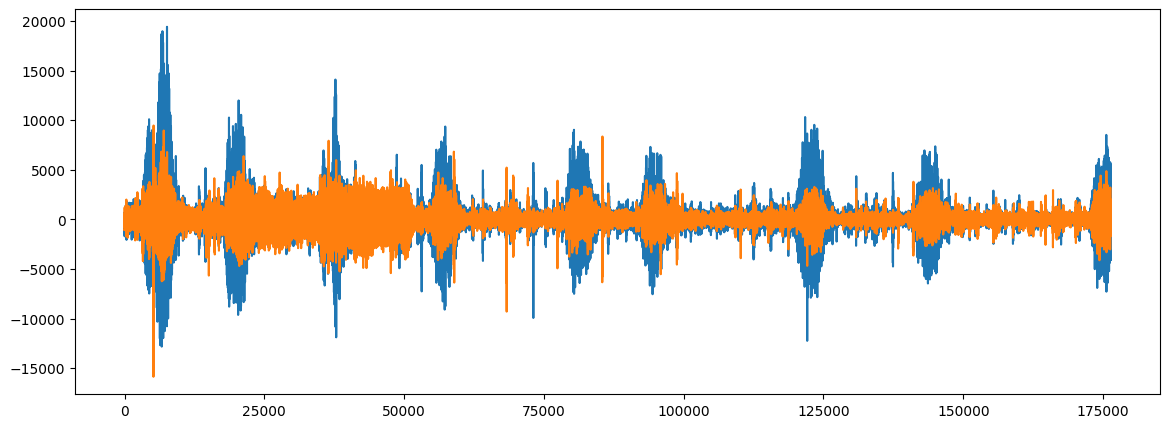

In [19]:
plt.figure(figsize=(14,5))
plt.plot(wave_audio)
plt.show()

In [20]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [21]:
mfccs

array([[-2.74524567e+02, -2.46964874e+02, -2.40361237e+02, ...,
        -2.19329987e+02, -2.18414948e+02, -2.17820816e+02],
       [ 8.14012299e+01,  7.74209518e+01,  8.13406219e+01, ...,
         1.16859703e+02,  1.13976654e+02,  9.65637970e+01],
       [-3.39259148e+01, -3.64744110e+01, -5.11566048e+01, ...,
        -5.13731766e+01, -6.29509621e+01, -5.71873894e+01],
       ...,
       [-5.18415880e+00, -1.41824341e+00,  3.67195153e+00, ...,
         6.38548553e-01, -5.71901679e-01,  4.83797836e+00],
       [-1.20135765e+01, -1.12624226e+01, -4.61993885e+00, ...,
        -3.03686571e+00,  3.28403711e-02, -2.44187355e-01],
       [ 2.18140626e+00, -3.86890817e+00, -6.66064501e+00, ...,
        -1.50853348e+00, -5.12778378e+00, -9.02797318e+00]], dtype=float32)

In [5]:
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/UrbanSound8K/audio'
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [9]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [7]:
!pip uninstall librosa resampy -y
!pip install librosa resampy


Found existing installation: librosa 0.10.2.post1
Uninstalling librosa-0.10.2.post1:
  Successfully uninstalled librosa-0.10.2.post1
Found existing installation: resampy 0.4.3
Uninstalling resampy-0.4.3:
  Successfully uninstalled resampy-0.4.3
  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached resampy-0.4.3-py3-none-any.whl.metadata (3.0 kB)
Using cached librosa-0.10.2.post1-py3-none-any.whl (260 kB)
Using cached resampy-0.4.3-py3-none-any.whl (3.1 MB)


In [10]:
import numpy as np
import resampy
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [25:07,  2.04it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [58:55,  2.82it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [58:56,  3.03it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [1:01:42,  2.36it/s]


In [11]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [12]:
x=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [13]:
x.shape

(8732, 40)

In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
x_train.shape

(6985, 40)

In [18]:
x_test.shape

(1747, 40)

In [19]:
y_test.shape

(1747, 10)

#Model Creation


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [21]:
num_labels=y.shape[1]

In [22]:
Dense()

TypeError: Dense.__init__() missing 1 required positional argument: 'units'

In [24]:
model=Sequential()

# first layer
model.add(Dense(100,input_shape=(40,), activation='relu')) # Pass activation as a parameter to Dense
model.add(Dropout(0.5))

#second layer
model.add(Dense(200, activation='relu')) # Pass activation as a parameter to Dense
model.add(Dropout(0.5))

#third layer
model.add(Dense(100, activation='relu')) # Pass activation as a parameter to Dense
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               4100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               20200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [26]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start=datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)

duration=datetime.now()-start
print("Training completed in time:",duration)

Epoch 1/100
209/219 [===========================>..] - ETA: 0s - loss: 11.8648 - accuracy: 0.1207
Epoch 1: val_loss improved from inf to 2.26790, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 3s 6ms/step - loss: 11.4925 - accuracy: 0.1211 - val_loss: 2.2679 - val_accuracy: 0.1254
Epoch 2/100
 31/219 [===>..........................] - ETA: 0s - loss: 2.9305 - accuracy: 0.1442

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


217/219 [============================>.] - ETA: 0s - loss: 2.6060 - accuracy: 0.1339
Epoch 2: val_loss improved from 2.26790 to 2.24710, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.6038 - accuracy: 0.1339 - val_loss: 2.2471 - val_accuracy: 0.1196
Epoch 3/100
210/219 [===========================>..] - ETA: 0s - loss: 2.3159 - accuracy: 0.1528
Epoch 3: val_loss improved from 2.24710 to 2.18690, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.3156 - accuracy: 0.1532 - val_loss: 2.1869 - val_accuracy: 0.1820
Epoch 4/100
210/219 [===========================>..] - ETA: 0s - loss: 2.2158 - accuracy: 0.1927
Epoch 4: val_loss improved from 2.18690 to 2.09619, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.2122 - accuracy: 0.1934 - val_loss: 2.0962 - val_accuracy: 0.2433
Epoch 5

In [28]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.7641671299934387


In [36]:
filename="/content/drive/MyDrive/UrbanSound8K/audio/fold8/95549-3-0-7.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
# Use the predict method and then take the argmax to get the predicted class
predictions = model.predict(prediction_feature)
predicted_class = predictions.argmax(axis=-1)
predicted_class

1/1 [==============================] - 0s 211ms/step


array([9])

In [34]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

# Testing Audio Data

In [42]:
filename="/content/drive/MyDrive/UrbanSound8K/audio/fold4/109711-3-1-0.wav"
audio, sample_rate = librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)

# Use predict to get the probabilities for each class
predicted_probabilities = model.predict(mfccs_scaled_features)
# Get the predicted labels using argmax
predicted_labels = np.argmax(predicted_probabilities, axis=-1)

prediction_class=labelencoder.inverse_transform(predicted_labels)
prediction_class

[-3.22716064e+02  1.14380936e+02 -6.33029556e+01 -5.95665703e+01
 -3.06651363e+01 -1.95177040e+01 -4.05099983e+01 -2.83802795e+01
 -1.71250019e+01 -1.54916811e+01 -2.00649166e+01 -1.54449701e+01
 -1.53770266e+01 -3.61723566e+00  6.57277286e-01  5.06461811e+00
  2.80211544e+00  2.47769547e+00 -5.32511520e+00 -4.70740128e+00
 -5.19057560e+00  8.16310942e-01 -1.83027864e+00 -3.27661490e+00
 -4.72259760e+00 -3.98002043e-02 -1.28008258e+00  1.57355309e+00
  5.08117914e-01  7.69878435e+00  3.32250428e+00  2.86424613e+00
 -7.76302278e-01  1.50249553e+00 -2.07205844e+00  1.94129258e-01
 -1.24945775e-01 -5.44272006e-01 -1.59249508e+00  3.43078882e-01]
1/1 [==============================] - 0s 70ms/step


array(['dog_bark'], dtype='<U16')